# 🖼️ Image Data Algorithms - Fashion-MNIST Classification

Welcome to the Image Data arena! In this notebook, we'll apply various machine learning algorithms to the **Fashion-MNIST dataset** - a more challenging alternative to the classic MNIST digits dataset.

## 📊 Dataset: Fashion-MNIST

- **Dataset Size**: 60,000 training + 10,000 test images
- **Image Size**: 28×28 grayscale pixels
- **Classes**: 10 fashion categories
- **Source**: Zalando Research

## 🤖 Algorithms Implemented:

1. **K-Nearest Neighbors (KNN)**
2. **Random Forest Classifier**
3. **Support Vector Machine (SVM)**
4. **Convolutional Neural Network (CNN)**
5. **Logistic Regression**

## 🎯 Goals:

- Compare traditional ML vs Deep Learning approaches
- Evaluate performance across multiple metrics
- Generate comprehensive results for dashboard visualization


In [ ]:
# 📚 Import Required Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import json
import time
import warnings
warnings.filterwarnings('ignore')

# Suppress TensorFlow warnings and oneDNN messages
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suppress TensorFlow INFO and WARNING messages
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'  # Disable oneDNN optimizations to avoid floating-point differences

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Deep Learning Libraries
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Additional TensorFlow warning suppressions
tf.get_logger().setLevel('ERROR')  # Only show ERROR messages from TensorFlow

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("✅ All libraries imported successfully!")
print(f"TensorFlow version: {tf.__version__}")
print(f"Sklearn available")
print(f"Numpy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print("🔇 TensorFlow warnings suppressed for cleaner output")

✅ All libraries imported successfully!
TensorFlow version: 2.16.2
Sklearn available
Numpy version: 1.26.3
Pandas version: 2.2.2


In [2]:
# 📊 Load and Explore Fashion-MNIST Dataset

# Load Fashion-MNIST dataset
print("🔄 Loading Fashion-MNIST dataset...")
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Fashion-MNIST class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Dataset information
print("✅ Dataset loaded successfully!")
print(f"Training set shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")
print(f"Number of classes: {len(class_names)}")
print(f"Class names: {class_names}")
print(f"Pixel value range: {X_train.min()} - {X_train.max()}")

# Check class distribution
unique, counts = np.unique(y_train, return_counts=True)
print(f"\nClass distribution in training set:")
for i, (class_idx, count) in enumerate(zip(unique, counts)):
    print(f"{class_names[class_idx]}: {count} samples")

🔄 Loading Fashion-MNIST dataset...
✅ Dataset loaded successfully!
Training set shape: (60000, 28, 28)
Training labels shape: (60000,)
Test set shape: (10000, 28, 28)
Test labels shape: (10000,)
Number of classes: 10
Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
Pixel value range: 0 - 255

Class distribution in training set:
T-shirt/top: 6000 samples
Trouser: 6000 samples
Pullover: 6000 samples
Dress: 6000 samples
Coat: 6000 samples
Sandal: 6000 samples
Shirt: 6000 samples
Sneaker: 6000 samples
Bag: 6000 samples
Ankle boot: 6000 samples


In [3]:
# 🔧 Data Preprocessing and Normalization

print("🔄 Preprocessing data...")

# Normalize pixel values to 0-1 range
X_train_normalized = X_train.astype('float32') / 255.0
X_test_normalized = X_test.astype('float32') / 255.0

# Flatten images for traditional ML algorithms
X_train_flat = X_train_normalized.reshape(X_train_normalized.shape[0], -1)
X_test_flat = X_test_normalized.reshape(X_test_normalized.shape[0], -1)

# Prepare data for CNN (add channel dimension)
X_train_cnn = X_train_normalized.reshape(-1, 28, 28, 1)
X_test_cnn = X_test_normalized.reshape(-1, 28, 28, 1)

# Convert labels to categorical for neural networks
y_train_categorical = to_categorical(y_train, 10)
y_test_categorical = to_categorical(y_test, 10)

print("✅ Data preprocessing completed!")
print(f"Flattened training data shape: {X_train_flat.shape}")
print(f"CNN training data shape: {X_train_cnn.shape}")
print(f"Normalized pixel range: {X_train_normalized.min():.3f} - {X_train_normalized.max():.3f}")
print(f"Categorical labels shape: {y_train_categorical.shape}")

# Subset data for faster traditional ML training (optional)
subset_size = 10000
X_train_subset = X_train_flat[:subset_size]
y_train_subset = y_train[:subset_size]
print(f"\nUsing subset of {subset_size} samples for traditional ML algorithms")

🔄 Preprocessing data...
✅ Data preprocessing completed!
Flattened training data shape: (60000, 784)
CNN training data shape: (60000, 28, 28, 1)
Normalized pixel range: 0.000 - 1.000
Categorical labels shape: (60000, 10)

Using subset of 10000 samples for traditional ML algorithms


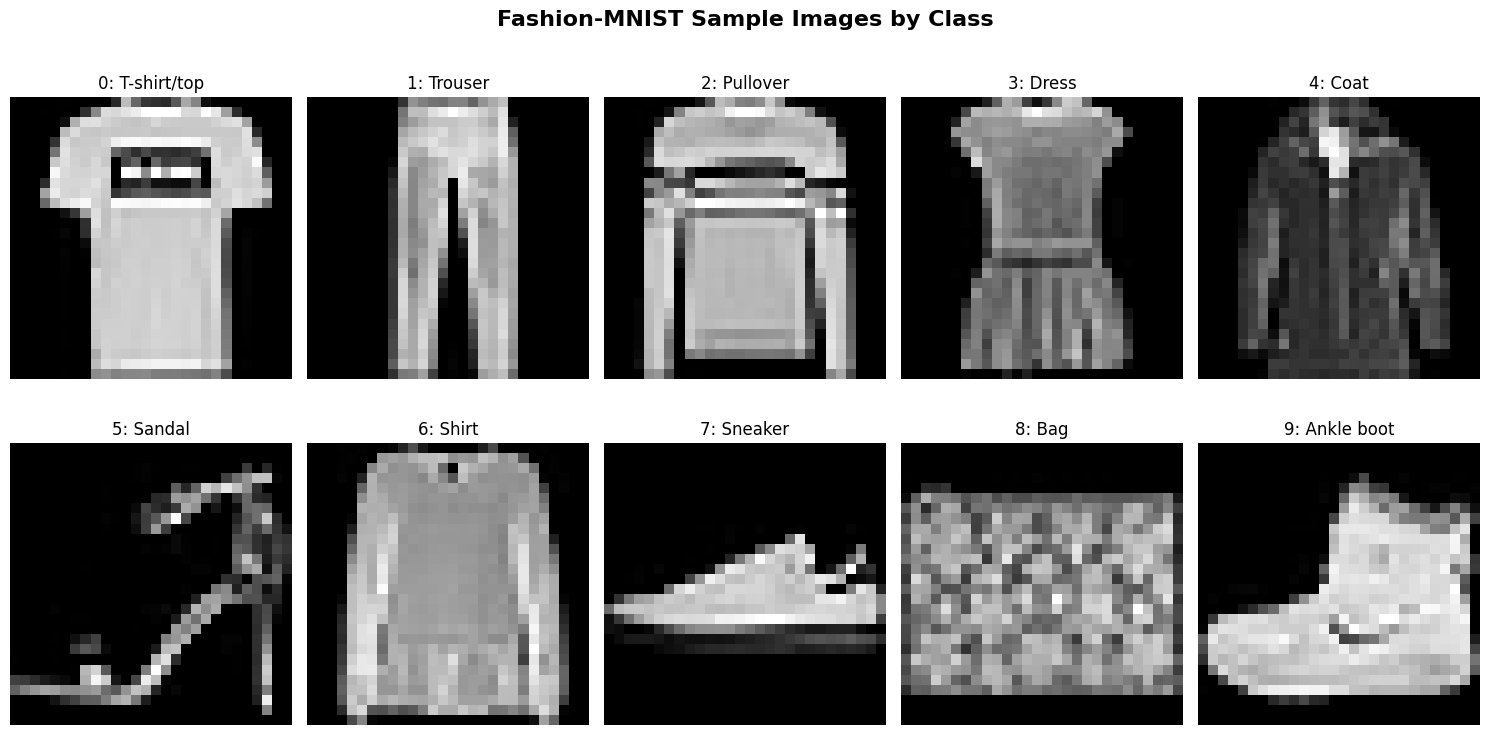

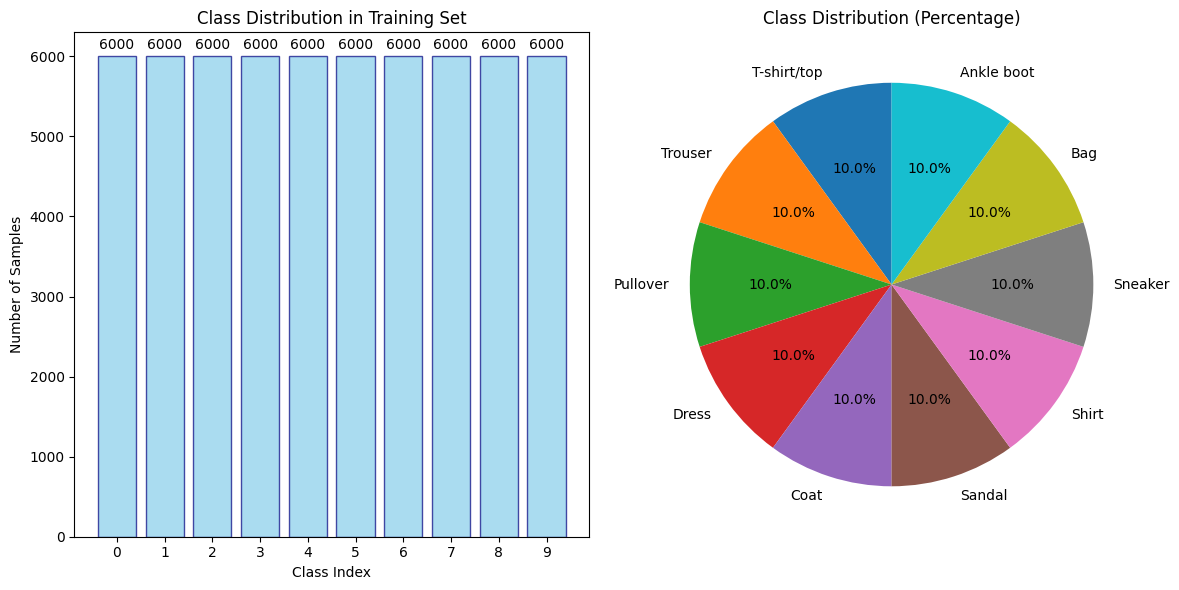

📊 Sample images and distribution visualized successfully!


In [4]:
# 📊 Visualize Sample Images and Class Distribution

# Plot sample images from each class
fig, axes = plt.subplots(2, 5, figsize=(15, 8))
fig.suptitle('Fashion-MNIST Sample Images by Class', fontsize=16, fontweight='bold')

for i, class_name in enumerate(class_names):
    # Find first occurrence of each class
    class_idx = np.where(y_train == i)[0][0]
    
    row = i // 5
    col = i % 5
    
    axes[row, col].imshow(X_train[class_idx], cmap='gray')
    axes[row, col].set_title(f'{i}: {class_name}', fontsize=12)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

# Class distribution visualization
plt.figure(figsize=(12, 6))

# Bar plot
plt.subplot(1, 2, 1)
counts = [np.sum(y_train == i) for i in range(10)]
bars = plt.bar(range(10), counts, color='skyblue', edgecolor='navy', alpha=0.7)
plt.xlabel('Class Index')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in Training Set')
plt.xticks(range(10), [f'{i}' for i in range(10)])

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 50,
             f'{int(height)}', ha='center', va='bottom', fontsize=10)

# Pie chart
plt.subplot(1, 2, 2)
plt.pie(counts, labels=[class_names[i] for i in range(10)], autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution (Percentage)')

plt.tight_layout()
plt.show()

print("📊 Sample images and distribution visualized successfully!")

In [5]:
# 📋 Initialize Results Storage
results = {}
performance_summary = []

print("📋 Results storage initialized!")

📋 Results storage initialized!


In [6]:
# 🔢 Implement K-Nearest Neighbors (KNN)

print("🔄 Training KNN Classifier...")
start_time = time.time()

# Create and train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn.fit(X_train_subset, y_train_subset)

# Training time
knn_training_time = time.time() - start_time

# Make predictions
y_pred_knn = knn.predict(X_test_flat)

# Calculate accuracy
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Cross-validation
cv_scores_knn = cross_val_score(knn, X_train_subset, y_train_subset, cv=3, n_jobs=-1)

print(f"✅ KNN Training completed!")
print(f"KNN Accuracy: {knn_accuracy:.4f}")
print(f"KNN Training Time: {knn_training_time:.2f} seconds")
print(f"KNN CV Score: {cv_scores_knn.mean():.4f} ± {cv_scores_knn.std():.4f}")

# Store results
results['KNN'] = {
    'accuracy': knn_accuracy,
    'training_time': knn_training_time,
    'confusion_matrix': knn_conf_matrix.tolist(),
    'predictions': y_pred_knn.tolist(),
    'cv_mean': cv_scores_knn.mean(),
    'cv_std': cv_scores_knn.std(),
    'model_type': 'traditional_ml'
}

performance_summary.append({
    'Algorithm': 'KNN',
    'Accuracy': knn_accuracy,
    'Training Time (s)': knn_training_time,
    'CV Score': cv_scores_knn.mean()
})

🔄 Training KNN Classifier...
✅ KNN Training completed!
KNN Accuracy: 0.8179
KNN Training Time: 0.03 seconds
KNN CV Score: 0.8172 ± 0.0045


In [7]:
# 🌲 Implement Random Forest Classifier

print("🔄 Training Random Forest Classifier...")
start_time = time.time()

# Create and train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train_subset, y_train_subset)

# Training time
rf_training_time = time.time() - start_time

# Make predictions
y_pred_rf = rf.predict(X_test_flat)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Cross-validation
cv_scores_rf = cross_val_score(rf, X_train_subset, y_train_subset, cv=3, n_jobs=-1)

print(f"✅ Random Forest Training completed!")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Random Forest Training Time: {rf_training_time:.2f} seconds")
print(f"Random Forest CV Score: {cv_scores_rf.mean():.4f} ± {cv_scores_rf.std():.4f}")

# Store results
results['Random Forest'] = {
    'accuracy': rf_accuracy,
    'training_time': rf_training_time,
    'confusion_matrix': rf_conf_matrix.tolist(),
    'predictions': y_pred_rf.tolist(),
    'cv_mean': cv_scores_rf.mean(),
    'cv_std': cv_scores_rf.std(),
    'model_type': 'traditional_ml'
}

performance_summary.append({
    'Algorithm': 'Random Forest',
    'Accuracy': rf_accuracy,
    'Training Time (s)': rf_training_time,
    'CV Score': cv_scores_rf.mean()
})

🔄 Training Random Forest Classifier...
✅ Random Forest Training completed!
Random Forest Accuracy: 0.8495
Random Forest Training Time: 12.10 seconds
Random Forest CV Score: 0.8525 ± 0.0031


In [8]:
# ⚡ Implement Support Vector Machine (SVM)

print("🔄 Training SVM Classifier...")
start_time = time.time()

# Create and train SVM (using smaller subset for SVM due to computational complexity)
svm_subset_size = 5000
X_train_svm = X_train_flat[:svm_subset_size]
y_train_svm = y_train[:svm_subset_size]

svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train_svm, y_train_svm)

# Training time
svm_training_time = time.time() - start_time

# Make predictions
y_pred_svm = svm.predict(X_test_flat)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_conf_matrix = confusion_matrix(y_test, y_pred_svm)

# Cross-validation (on smaller subset)
cv_scores_svm = cross_val_score(svm, X_train_svm, y_train_svm, cv=3)

print(f"✅ SVM Training completed!")
print(f"SVM Accuracy: {svm_accuracy:.4f}")
print(f"SVM Training Time: {svm_training_time:.2f} seconds")
print(f"SVM CV Score: {cv_scores_svm.mean():.4f} ± {cv_scores_svm.std():.4f}")
print(f"Note: SVM trained on {svm_subset_size} samples for computational efficiency")

# Store results
results['SVM'] = {
    'accuracy': svm_accuracy,
    'training_time': svm_training_time,
    'confusion_matrix': svm_conf_matrix.tolist(),
    'predictions': y_pred_svm.tolist(),
    'cv_mean': cv_scores_svm.mean(),
    'cv_std': cv_scores_svm.std(),
    'model_type': 'traditional_ml'
}

performance_summary.append({
    'Algorithm': 'SVM',
    'Accuracy': svm_accuracy,
    'Training Time (s)': svm_training_time,
    'CV Score': cv_scores_svm.mean()
})

🔄 Training SVM Classifier...
✅ SVM Training completed!
SVM Accuracy: 0.8343
SVM Training Time: 10.14 seconds
SVM CV Score: 0.8452 ± 0.0135
Note: SVM trained on 5000 samples for computational efficiency


In [9]:
# 📈 Implement Logistic Regression

print("🔄 Training Logistic Regression...")
start_time = time.time()

# Create and train Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=1000, n_jobs=-1)
lr.fit(X_train_subset, y_train_subset)

# Training time
lr_training_time = time.time() - start_time

# Make predictions
y_pred_lr = lr.predict(X_test_flat)

# Calculate accuracy
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_conf_matrix = confusion_matrix(y_test, y_pred_lr)

# Cross-validation
cv_scores_lr = cross_val_score(lr, X_train_subset, y_train_subset, cv=3, n_jobs=-1)

print(f"✅ Logistic Regression Training completed!")
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
print(f"Logistic Regression Training Time: {lr_training_time:.2f} seconds")
print(f"Logistic Regression CV Score: {cv_scores_lr.mean():.4f} ± {cv_scores_lr.std():.4f}")

# Store results
results['Logistic Regression'] = {
    'accuracy': lr_accuracy,
    'training_time': lr_training_time,
    'confusion_matrix': lr_conf_matrix.tolist(),
    'predictions': y_pred_lr.tolist(),
    'cv_mean': cv_scores_lr.mean(),
    'cv_std': cv_scores_lr.std(),
    'model_type': 'traditional_ml'
}

performance_summary.append({
    'Algorithm': 'Logistic Regression',
    'Accuracy': lr_accuracy,
    'Training Time (s)': lr_training_time,
    'CV Score': cv_scores_lr.mean()
})

🔄 Training Logistic Regression...
✅ Logistic Regression Training completed!
Logistic Regression Accuracy: 0.8258
Logistic Regression Training Time: 58.10 seconds
Logistic Regression CV Score: 0.8289 ± 0.0018


In [10]:
# 🧠 Define Convolutional Neural Network (CNN) Architecture

def create_cnn():
    """
    Create a CNN model for Fashion-MNIST classification
    """
    model = Sequential([
        # First convolutional block
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        
        # Second convolutional block
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        
        # Third convolutional block
        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        
        # Flatten and dense layers
        Flatten(),
        Dropout(0.5),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(10, activation='softmax')
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Create CNN model
cnn_model = create_cnn()

# Display model architecture
print("🧠 CNN Architecture:")
cnn_model.summary()

# Count parameters
total_params = cnn_model.count_params()
print(f"\nTotal Parameters: {total_params:,}")

🧠 CNN Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,954 (949.04 KB)

 Trainable params: 242,250 (946.29 KB)

 Non-trainable params: 704 (2.75 KB)


Total Parameters: 242,954


In [ ]:
# 🔥 Train Convolutional Neural Network (CNN)

print("🔄 Training CNN Model...")
start_time = time.time()

# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=0.0001,
    verbose=1
)

# Train the model
history = cnn_model.fit(
    X_train_cnn, y_train_categorical,
    validation_data=(X_test_cnn, y_test_categorical),
    epochs=20,
    batch_size=128,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Training time
cnn_training_time = time.time() - start_time

# Make predictions
y_pred_cnn_prob = cnn_model.predict(X_test_cnn)
y_pred_cnn = np.argmax(y_pred_cnn_prob, axis=1)

# Calculate accuracy
cnn_accuracy = accuracy_score(y_test, y_pred_cnn)
cnn_conf_matrix = confusion_matrix(y_test, y_pred_cnn)

# Get final loss
final_loss = min(history.history['val_loss'])

print(f"✅ CNN Training completed!")
print(f"CNN Accuracy: {cnn_accuracy:.4f}")
print(f"CNN Training Time: {cnn_training_time:.2f} seconds")
print(f"CNN Final Validation Loss: {final_loss:.4f}")

# Store results
results['CNN'] = {
    'accuracy': cnn_accuracy,
    'training_time': cnn_training_time,
    'confusion_matrix': cnn_conf_matrix.tolist(),
    'predictions': y_pred_cnn.tolist(),
    'loss': final_loss,
    'model_type': 'deep_learning'
}

performance_summary.append({
    'Algorithm': 'CNN',
    'Accuracy': cnn_accuracy,
    'Training Time (s)': cnn_training_time,
    'CV Score': cnn_accuracy  # Using test accuracy as proxy
})

🔄 Training CNN Model...
Epoch 1/20
Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 108s 204ms/step - accuracy: 0.7506 - loss: 0.7124 - val_accuracy: 0.7879 - val_loss: 0.5696 - learning_rate: 0.0010
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 108s 204ms/step - accuracy: 0.7506 - loss: 0.7124 - val_accuracy: 0.7879 - val_loss: 0.5696 - learning_rate: 0.0010
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 99s 210ms/step - accuracy: 0.8675 - loss: 0.3617 - val_accuracy: 0.8762 - val_loss: 0.3334 - learning_rate: 0.0010
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 99s 210ms/step - accuracy: 0.8675 - loss: 0.3617 - val_accuracy: 0.8762 - val_loss: 0.3334 - learning_rate: 0.0010
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 108s 231ms/step - accuracy: 0.8876 - loss: 0.3068 - val_accuracy: 0.8786 - val_loss: 0.3297 - learning_rate: 0.0010
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 108s 231ms/step - accuracy: 0.8876 - loss: 0.3068 - val_accuracy: 0.8786 - val_loss: 0.3297 - learning_rate: 0.0010
Epoch 4/20
469/469 ━━━━━━━━━━━━

In [ ]:
# 📊 Compare Model Performance

print("📊 Generating Performance Comparison...")

# Create performance DataFrame
performance_df = pd.DataFrame(performance_summary)
performance_df = performance_df.sort_values('Accuracy', ascending=False)

print("\n🏆 Model Performance Ranking:")
print("=" * 60)
for idx, row in performance_df.iterrows():
    print(f"{row['Algorithm']:20} | Accuracy: {row['Accuracy']:.4f} | Time: {row['Training Time (s)']:8.2f}s | CV: {row['CV Score']:.4f}")

# Visualize performance comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Accuracy comparison
axes[0].barh(performance_df['Algorithm'], performance_df['Accuracy'], color='skyblue')
axes[0].set_xlabel('Accuracy')
axes[0].set_title('Model Accuracy Comparison')
axes[0].set_xlim(0, 1)

# Add accuracy values on bars
for i, v in enumerate(performance_df['Accuracy']):
    axes[0].text(v + 0.01, i, f'{v:.3f}', va='center')

# Training time comparison
axes[1].barh(performance_df['Algorithm'], performance_df['Training Time (s)'], color='lightcoral')
axes[1].set_xlabel('Training Time (seconds)')
axes[1].set_title('Training Time Comparison')

# Add time values on bars
for i, v in enumerate(performance_df['Training Time (s)']):
    axes[1].text(v + 0.5, i, f'{v:.1f}s', va='center')

# Accuracy vs Time scatter plot
axes[2].scatter(performance_df['Training Time (s)'], performance_df['Accuracy'], 
               s=100, alpha=0.7, c=range(len(performance_df)), cmap='viridis')
axes[2].set_xlabel('Training Time (seconds)')
axes[2].set_ylabel('Accuracy')
axes[2].set_title('Accuracy vs Training Time Trade-off')

# Add algorithm labels
for i, row in performance_df.iterrows():
    axes[2].annotate(row['Algorithm'], 
                    (row['Training Time (s)'], row['Accuracy']),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=9, alpha=0.8)

plt.tight_layout()
plt.show()

# Best performing algorithm
best_algorithm = performance_df.iloc[0]
print(f"\n🥇 Best Performing Algorithm: {best_algorithm['Algorithm']}")
print(f"   Accuracy: {best_algorithm['Accuracy']:.4f}")
print(f"   Training Time: {best_algorithm['Training Time (s)']:.2f} seconds")

In [ ]:
# 🔍 Generate Confusion Matrices

print("🔍 Generating Confusion Matrices for All Models...")

# Create subplots for confusion matrices
n_models = len(results)
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for idx, (model_name, model_results) in enumerate(results.items()):
    if idx < len(axes):
        cm = np.array(model_results['confusion_matrix'])
        
        # Create heatmap
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=class_names, yticklabels=class_names,
                   ax=axes[idx])
        axes[idx].set_title(f'Confusion Matrix - {model_name}\nAccuracy: {model_results["accuracy"]:.4f}')
        axes[idx].set_xlabel('Predicted Label')
        axes[idx].set_ylabel('True Label')
        
        # Rotate labels for better readability
        axes[idx].tick_params(axis='x', rotation=45)
        axes[idx].tick_params(axis='y', rotation=0)

# Hide unused subplot
if len(results) < len(axes):
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

# Calculate per-class accuracy for best model
best_model_name = performance_df.iloc[0]['Algorithm']
best_cm = np.array(results[best_model_name]['confusion_matrix'])

print(f"\n📈 Per-Class Accuracy for Best Model ({best_model_name}):")
print("=" * 50)
for i, class_name in enumerate(class_names):
    class_accuracy = best_cm[i, i] / best_cm[i, :].sum()
    print(f"{class_name:15}: {class_accuracy:.4f}")
    
# Overall statistics
print(f"\nOverall Accuracy: {results[best_model_name]['accuracy']:.4f}")
print(f"Training Time: {results[best_model_name]['training_time']:.2f} seconds")

In [ ]:
# 💾 Save Results to JSON for Dashboard

print("💾 Saving results to JSON for Streamlit dashboard...")

# Prepare final results structure
final_results = {
    'dataset_info': {
        'name': 'Fashion-MNIST',
        'train_samples': len(X_train),
        'test_samples': len(X_test),
        'num_classes': len(class_names),
        'class_names': class_names,
        'image_shape': [28, 28, 1]
    },
    'algorithms': results,
    'summary': performance_summary,
    'timestamp': time.strftime('%Y-%m-%d %H:%M:%S'),
    'metadata': {
        'notebook_version': '1.0',
        'subset_size_traditional_ml': subset_size,
        'svm_subset_size': svm_subset_size,
        'total_algorithms': len(results)
    }
}

# Create data directory if it doesn't exist
import os
os.makedirs('../data', exist_ok=True)

# Save to JSON file
output_file = '../data/image_results.json'
",
with open(output_file, 'w') as f:
    json.dump(final_results, f, indent=2)

print(f"✅ Results saved successfully to {output_file}")
print(f"📊 Total algorithms trained: {len(results)}")
print(f"🏆 Best accuracy: {max([r['accuracy'] for r in results.values()]):.4f}")
print(f"⚡ Fastest training: {min([r['training_time'] for r in results.values()]):.2f}s")

# Display summary statistics
print(f"\n📈 Summary Statistics:")
print("=" * 50)
accuracies = [r['accuracy'] for r in results.values()]
times = [r['training_time'] for r in results.values()]

print(f"Mean Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")
print(f"Mean Training Time: {np.mean(times):.2f} ± {np.std(times):.2f} seconds")
print(f"Accuracy Range: {min(accuracies):.4f} - {max(accuracies):.4f}")
print(f"Time Range: {min(times):.2f}s - {max(times):.2f}s")

print(f"\n🎯 Ready for Streamlit Dashboard!")
print(f"Run: streamlit run streamlit_app/02_Image_Data.py")